In [45]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import json
import re
import requests

%matplotlib inline

matplotlib.style.use('ggplot')

# Gather

- Gather the data from different sources
    - Getting Data from an existing source (twitter-archive-enhanced.csv and image-predictions.tsv)
    - Install tweepy and query Twitter's api. And then save each tweet's returned JSON as a new line in a .txt       file
- Import all the data into Jupyter Notebook
- Merge data from three different sources and save it as csv file

In [46]:
archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [47]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [48]:
archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [49]:
#unusual names
archive_enhanced[archive_enhanced['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [50]:
# Use requests library to download tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
img_predict = pd.read_csv('image_predictions.tsv', sep='\t')

In [51]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
img_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169


KeyboardInterrupt: 

In [57]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
#tweet_data.set_index('tweet_id', inplace = True)
tweet_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2339,666049248165822465,109,40,6629803,132918,2015-11-16 00:24:50
2340,666044226329800704,301,141,6629803,132918,2015-11-16 00:04:52
2341,666033412701032449,125,44,6629803,132918,2015-11-15 23:21:54
2342,666029285002620928,131,47,6629803,132918,2015-11-15 23:05:30
2343,666020888022790149,2561,520,6629803,132918,2015-11-15 22:32:08


# Assess

In [58]:
#Print random examples
archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
292,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,13,10,Daisy,None,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None
244,846042936437604353,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I present to you... Dog Jesus. ...,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
665,790698755171364864,NaN,NaN,2016-10-24 23:37:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mosby. He appears to be rather h*ckin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790698755...,12,10,Mosby,None,None,None,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None


In [59]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [60]:
archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [61]:
archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [62]:
archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [63]:
archive_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Ben          1
Dudley       1
Tino         1
Ivar         1
Wiggles      1
Name: name, Length: 957, dtype: int64

In [64]:
#Print random examples
img_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False
1508,785872687017132033,https://pbs.twimg.com/ext_tw_video_thumb/78587...,1,Great_Pyrenees,0.392108,True,golden_retriever,0.198358,True,Pekinese,0.143328,True
1274,750041628174217216,https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg,1,Labrador_retriever,0.252031,True,Maltese_dog,0.188090,True,golden_retriever,0.133017,True
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,1,Staffordshire_bullterrier,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True


In [65]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [66]:
img_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [67]:
img_predict.jpg_url.value_counts()

https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg    2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg    2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg    2
                                                  ..
https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg    1
https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg    1
https://pbs.twimg.com/media/CdecUSzUIAAHCvg.jpg    1
https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg    1
https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [68]:
img_predict.jpg_url.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [69]:
img_predict.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [70]:
tweet_data.sample(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
236,846505985330044928,15028,3389,6629297,132918,2017-03-27 23:35:28
882,759446261539934208,1813,550,6629370,132918,2016-07-30 17:51:13
1120,728986383096946689,3397,895,6629507,132918,2016-05-07 16:34:32
2114,670338931251150849,445,118,6629744,132918,2015-11-27 20:30:30
374,827199976799354881,11462,2509,6629313,132918,2017-02-02 17:00:17


In [71]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2344 non-null   int64 
 1   favorites        2344 non-null   int64 
 2   retweets         2344 non-null   int64 
 3   user_followers   2344 non-null   int64 
 4   user_favourites  2344 non-null   int64 
 5   date_time        2344 non-null   object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


In [72]:
tweet_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.344000e+03,2344.000000,2344.000000,2.344000e+03,2344.000000
mean,7.423060e+17,8096.671502,3041.508532,6.629503e+06,132917.979522
std,6.834853e+16,12179.493014,5056.547344,1.693761e+02,0.201379
min,6.660209e+17,0.000000,0.000000,6.629027e+06,132916.000000
25%,6.783704e+17,1406.750000,608.750000,6.629331e+06,132918.000000
50%,7.189556e+17,3548.000000,1420.000000,6.629514e+06,132918.000000
75%,7.986989e+17,10015.500000,3544.500000,6.629651e+06,132918.000000
max,8.924206e+17,143885.000000,77689.000000,6.629803e+06,132918.000000


In [73]:
tweet_data.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
666817836334096384    1
794926597468000259    1
673705679337693185    1
673342308415348736    1
700151421916807169    1
Name: tweet_id, Length: 2344, dtype: int64

In [74]:
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38952,8636,6629272,132918,2017-08-01 16:23:56
1,892177421306343426,33352,6343,6629272,132918,2017-08-01 00:17:27
2,891815181378084864,25127,4209,6629272,132918,2017-07-31 00:18:03
3,891689557279858688,42300,8755,6629272,132918,2017-07-30 15:58:51
4,891327558926688256,40458,9517,6629272,132918,2017-07-29 16:00:24


## Quality
- archive_enhanced
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,        retweeted_status_timestamp, expanded_urls have null values
    - The numberator annd denominator columns have invalid values
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and tweet_id shoud be string
    - timestamp column should be datetime type
    - Name column has invalid names such as 'None', 'a', 'an' and less than 3 characters.
- img_predict
    - All columns have missing values (2075 rows)
    - jpg_url column has duplucate 
- tweet_data
    - tweet_id should not be integer but str
   

## Tidiness
- Remove Unnamed column
- Put "dogoo", "floofer", "pupper" and "puppo" columns into one column "dog_stage"
- Join archive_enhanced, img_predict and tweet_data datasets

# Cleaning

In [75]:
# copy dataframes
tweet_data_copy = tweet_data.copy()
archive_enhanced_copy = archive_enhanced.copy()
img_predict_copy = img_predict.copy()

In [76]:
df = pd.merge(left=archive_enhanced_copy, right=tweet_data_copy, left_on='tweet_id', right_on='tweet_id', how='inner')
df = df.merge(img_predict_copy, on='tweet_id', how='inner')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2068 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2068 non-null   object 
 4   source                      2068 non-null   object 
 5   text                        2068 non-null   object 
 6   retweeted_status_id         75 non-null     float64
 7   retweeted_status_user_id    75 non-null     float64
 8   retweeted_status_timestamp  75 non-null     object 
 9   expanded_urls               2068 non-null   object 
 10  rating_numerator            2068 non-null   int64  
 11  rating_denominator          2068 non-null   int64  
 12  name                        2068 non-null   object 
 13  doggo                       2068 

## Define:
- Merge "dogoo", "floofer", "pupper" and "puppo" columns into one column "dog_stage"

## Code:

In [78]:
df.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns = {0: 'count'})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1747
1,None,None,None,puppo,23
2,None,None,pupper,None,211
3,None,floofer,None,None,7
4,doggo,None,None,None,67
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,11
7,doggo,floofer,None,None,1


In [79]:
df.doggo.replace('None', ' ', inplace = True)
df.doggo.replace(np.NaN, ' ', inplace = True)
df.floofer.replace('None', ' ', inplace = True)
df.floofer.replace(np.NaN, ' ', inplace = True)
df.pupper.replace('None', ' ', inplace = True)
df.pupper.replace(np.NaN, ' ', inplace = True)
df.puppo.replace('None', ' ', inplace = True)
df.puppo.replace(np.NaN, ' ', inplace = True)

In [80]:
df.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns = {0: 'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,1747
1,,,,puppo,23
2,,,pupper,,211
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [81]:
dog_stage = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in df['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_stage.append(y[x.index(word)])
            break
    else:
        dog_stage.append('None')

df['dog_stage'] = dog_stage

In [82]:
# remove pupper, puppo, doggo and floof columns
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
#df.columns

## Test:

In [83]:
df['dog_stage'].value_counts()

None      1683
pupper     247
doggo       73
floof       35
puppo       30
Name: dog_stage, dtype: int64

## Define:
- Delete the retweets
- Delete duplicated tweet_id
- Delete tweets with no pictures

## Code:

In [85]:
# Delete the retweets
df = df[pd.isnull(df.retweeted_status_id)]

# Delete duplicated tweet_id
df = df.drop_duplicates()

# Delete tweets with no pictures
df = df.dropna(subset = ['jpg_url'])



## Test:

In [86]:
# test
len(df)

1993

In [87]:
# Delete the retweet columns we dont need
df = df.drop('retweeted_status_id', 1)
df = df.drop('retweeted_status_user_id', 1)
df = df.drop('retweeted_status_timestamp', 1)

#len(df)

## Define:
- timestamp column should be datetime type

## Code:

In [88]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp = df.timestamp.values.astype('datetime64[ns]')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


## Test


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1993 non-null   int64         
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1993 non-null   datetime64[ns]
 4   source                 1993 non-null   object        
 5   text                   1993 non-null   object        
 6   expanded_urls          1993 non-null   object        
 7   rating_numerator       1993 non-null   int64         
 8   rating_denominator     1993 non-null   int64         
 9   name                   1993 non-null   object        
 10  favorites              1993 non-null   int64         
 11  retweets               1993 non-null   int64         
 12  user_followers         1993 non-null   int64         
 13  use

## Define:
- put prediction algorithms and level of confidence into one column

## Code:

In [90]:
# We will store the fisrt true algorithm with it's level of confidence
predict = []
confid = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(df):
    if df['p1_dog'] == True:
        predict.append(df['p1'])
        confid.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        predict.append(df['p2'])
        confid.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        predict.append(df['p3'])
        confid.append(df['p3_conf'])
    else:
        predict.append('NaN')
        confid.append(0)

df.apply(get_prediction_confidence, axis=1)
df['prediction_algorithm'] = predict
df['confidence_level'] = confid

## Test:

In [91]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorites', 'retweets', 'user_followers',
       'user_favourites', 'date_time', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage', 'prediction_algorithm', 'confidence_level'],
      dtype='object')

## Define:
- Remove original columns

## Code:

In [92]:
# Remove 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
df = df.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

## Test:

In [93]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorites', 'retweets', 'user_followers',
       'user_favourites', 'date_time', 'jpg_url', 'dog_stage',
       'prediction_algorithm', 'confidence_level'],
      dtype='object')

## Define:
- Remove 'in_reply_to_status_id', 'in_reply_to_user_id' columns

## Code:

In [94]:
df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 1)

## Test:

In [95]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweets', 'user_followers', 'user_favourites', 'date_time', 'jpg_url',
       'dog_stage', 'prediction_algorithm', 'confidence_level'],
      dtype='object')

## Define:
- Clean the content of source column

## Code:

In [96]:
df['source'] = df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

## Test:

In [97]:
df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,dog_stage,prediction_algorithm,confidence_level
1359,685198997565345792,2016-01-07 20:39:06,Twitter for iPhone,This is Alfie. That is his time machine. He's ...,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,2501,739,6629621,132918,2016-01-07 20:39:06,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,None,Old_English_sheepdog,0.009671
183,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,17299,3356,6629296,132918,2017-04-01 16:35:01,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,None,Bedlington_terrier,0.333486
1216,695794761660297217,2016-02-06 02:22:53,Twitter for iPhone,This is Wyatt. His throne is modeled after him...,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,3421,858,6629568,132918,2016-02-06 02:22:53,https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg,None,Samoyed,0.962139
1122,704480331685040129,2016-03-01 01:36:14,Twitter for iPhone,Meet Lucia. She's a Cumulonimbus Floofmallow. ...,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,3651,1165,6629545,132918,2016-03-01 01:36:14,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,floof,Samoyed,0.979206
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33352,6343,6629272,132918,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581
843,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,3218,695,6629469,132918,2016-06-20 20:49:19,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,puppo,Old_English_sheepdog,0.427481
1249,692901601640583168,2016-01-29 02:46:29,Twitter for iPhone,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601...,10,10,None,1928,666,6629570,132918,2016-01-29 02:46:29,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,None,soft-coated_wheaten_terrier,0.403496
1870,669603084620980224,2015-11-25 19:46:30,Twitter for iPhone,Very human-like. Cute overbite smile *finger t...,https://twitter.com/dog_rates/status/669603084...,10,10,None,989,392,6629761,132918,2015-11-25 19:46:30,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,None,Maltese_dog,0.659619
1717,672488522314567680,2015-12-03 18:52:12,Twitter for iPhone,"This is Jackie. She was all ready to go out, b...",https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,1160,471,6629699,132918,2015-12-03 18:52:12,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,None,Doberman,0.605358
1966,667793409583771648,2015-11-20 19:55:30,Twitter for iPhone,Dogs only please. Small cows and other non can...,https://twitter.com/dog_rates/status/667793409...,8,10,None,720,345,6629773,132918,2015-11-20 19:55:30,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,None,dalmatian,0.535073


## Define:
- Fix numerators and denominators which are invalid values

## Code:

In [98]:
rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))
df['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # tweets with no rating but have a picture, so dog_count should be 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #exclude one tweet has the phrase '50/50'
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
df['rating'] = rating
df['dog_count'] = dog_count
df['rating'].value_counts()

12.0                 453
10.0                 410
11.0                 399
13.0                 261
9.0                  152
8.0                   94
7.0                   52
14.0                  36
6.0                   32
5.0                   30
3.0                   19
4.0                   14
2.0                    9
8.5                    4
1.0                    4
7.5                    3
9.5                    3
5.5                    2
6.5                    2
10.5                   2
0.0                    2
1776.0                 1
9.75                   1
NaN                    1
4.5                    1
11.27                  1
13.5                   1
420.0                  1
11.5                   1
9.666666666666666      1
11.26                  1
Name: rating, dtype: int64

## Define: 
- remove rating_numerator and rating_denominator columns

In [99]:
df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

## Test:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              1993 non-null   int64         
 1   timestamp             1993 non-null   datetime64[ns]
 2   source                1993 non-null   object        
 3   text                  1993 non-null   object        
 4   expanded_urls         1993 non-null   object        
 5   name                  1993 non-null   object        
 6   favorites             1993 non-null   int64         
 7   retweets              1993 non-null   int64         
 8   user_followers        1993 non-null   int64         
 9   user_favourites       1993 non-null   int64         
 10  date_time             1993 non-null   object        
 11  jpg_url               1993 non-null   object        
 12  dog_stage             1993 non-null   object        
 13  prediction_algorit

## Define:
- Transfer to the proper type for the columns

## Code:

In [101]:
df.set_index('tweet_id', inplace = True)
df.head()

,timestamp,source,text,expanded_urls,name,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,dog_stage,prediction_algorithm,confidence_level,rating,dog_count
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,38952,8636,6629272,132918,2017-08-01 16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,13,1.0
892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,33352,6343,6629272,132918,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581,13,1.0
891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,25127,4209,6629272,132918,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012,12,1.0
891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,42300,8755,6629272,132918,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086,13,1.0
891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,40458,9517,6629272,132918,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,basset,0.555712,12,1.0


In [102]:
#df['tweet_id'] = df['tweet_id'].astype('str')
df['source'] = df['source'].astype('category')
df['favorites'] = df['favorites'].astype('int')
df['retweets'] = df['retweets'].astype('int')
df['dog_stage'] = df['dog_stage'].astype('category')
df['rating'] = df['rating'].astype('float')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             1993 non-null   datetime64[ns]
 1   source                1993 non-null   category      
 2   text                  1993 non-null   object        
 3   expanded_urls         1993 non-null   object        
 4   name                  1993 non-null   object        
 5   favorites             1993 non-null   int64         
 6   retweets              1993 non-null   int64         
 7   user_followers        1993 non-null   int64         
 8   user_favourites       1993 non-null   int64         
 9   date_time             1993 non-null   object        
 10  jpg_url               1993 non-null   object        
 11  dog_stage             1993 non-null   category      
 12  prediction_algorithm  1993 non-null   object 

In [104]:
# Save dataframe to csv file
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [105]:
# test
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1993 non-null   int64  
 1   timestamp             1993 non-null   object 
 2   source                1993 non-null   object 
 3   text                  1993 non-null   object 
 4   expanded_urls         1993 non-null   object 
 5   name                  1993 non-null   object 
 6   favorites             1993 non-null   int64  
 7   retweets              1993 non-null   int64  
 8   user_followers        1993 non-null   int64  
 9   user_favourites       1993 non-null   int64  
 10  date_time             1993 non-null   object 
 11  jpg_url               1993 non-null   object 
 12  dog_stage             1993 non-null   object 
 13  prediction_algorithm  1685 non-null   object 
 14  confidence_level      1993 non-null   float64
 15  rating               

# Analysis

In [106]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [107]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1993 non-null   int64  
 1   timestamp             1993 non-null   object 
 2   source                1993 non-null   object 
 3   text                  1993 non-null   object 
 4   expanded_urls         1993 non-null   object 
 5   name                  1993 non-null   object 
 6   favorites             1993 non-null   int64  
 7   retweets              1993 non-null   int64  
 8   user_followers        1993 non-null   int64  
 9   user_favourites       1993 non-null   int64  
 10  date_time             1993 non-null   object 
 11  jpg_url               1993 non-null   object 
 12  dog_stage             1993 non-null   object 
 13  prediction_algorithm  1685 non-null   object 
 14  confidence_level      1993 non-null   float64
 15  rating               

In [108]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [109]:
df.head()

,tweet_id,source,text,expanded_urls,name,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,dog_stage,prediction_algorithm,confidence_level,rating,dog_count
timestamp,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,38952,8636,6629272,132918,2017-08-01 16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,13.0,1.0
2017-08-01 00:17:27,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,33352,6343,6629272,132918,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581,13.0,1.0
2017-07-31 00:18:03,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,25127,4209,6629272,132918,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012,12.0,1.0
2017-07-30 15:58:51,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,42300,8755,6629272,132918,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086,13.0,1.0
2017-07-29 16:00:24,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,40458,9517,6629272,132918,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,basset,0.555712,12.0,1.0


### Using the correlation map to see the relationships between variables

Text(0.5, 1, 'Correlation Map')

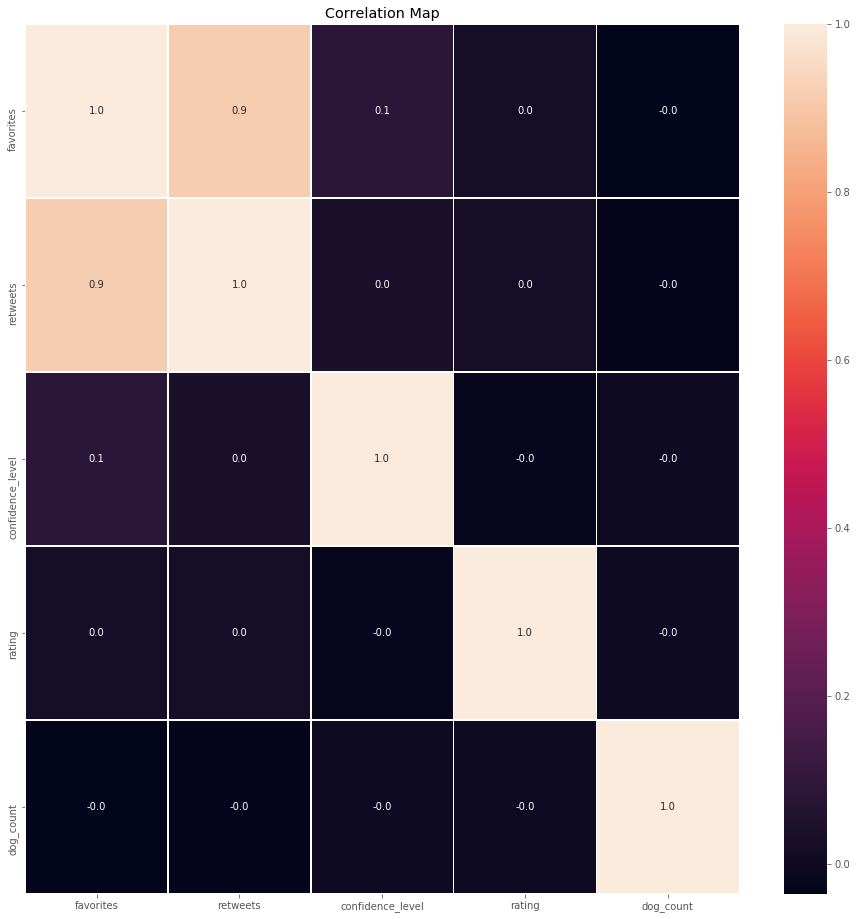

In [110]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df[['favorites','retweets',
                'confidence_level','rating', 'dog_count']].corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- From above correlation map we can see that only the relationship between favorites and retweets is strong positive.
- The relationship between favorities and confidence_level is positive but weak.

### The Relationship Between Favorites and Retweets

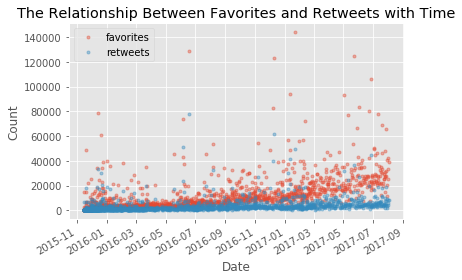

In [111]:
df[['favorites', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('The Relationship Between Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

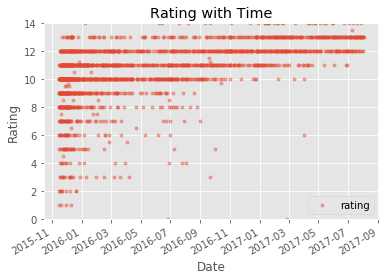

In [112]:
df.plot(y ='rating', ylim=[0,14], style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

- According to above analyses we can see that retweets and favorites have strong postive relationship. In other words, if the dog will get more favorities and retweets with higher rating if the dog is getting better. However, we didnt see the relationship between rating and retweets or rating and favorites is strong and positive.

/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


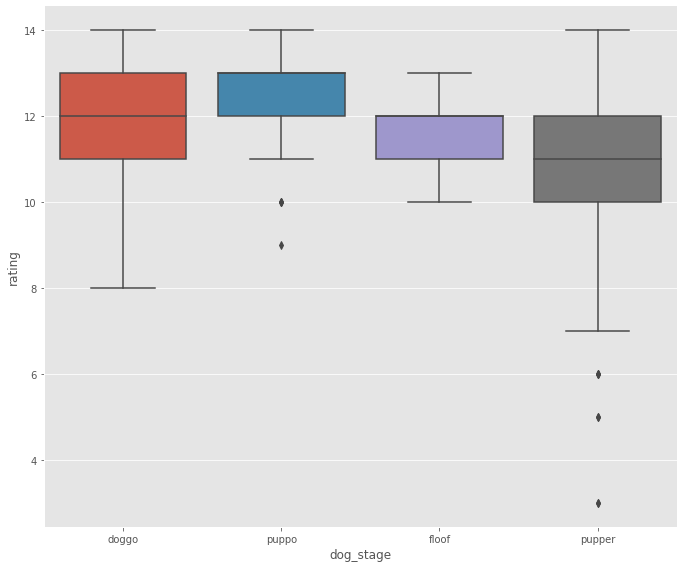

In [113]:
sns.factorplot(kind='box',        
               y='rating',       
               x='dog_stage',  
               data=df[df['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.2,   
               legend_out=False)

- According the above analysis, we found that pupper has lower rating and puppo has higher rating. And puppo has higher rating. 

In [114]:
df.groupby('dog_stage').rating.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1623.0,11.767971,45.039356,0.0,10.0,11.0,12.0,1776.0
doggo,69.0,11.797101,1.510548,8.0,11.0,12.0,13.0,14.0
floof,34.0,11.705882,0.759961,10.0,11.0,12.0,12.0,13.0
pupper,237.0,10.616160,1.833623,3.0,10.0,11.0,12.0,14.0
puppo,29.0,12.172414,1.197288,9.0,12.0,13.0,13.0,14.0


- In the previous analysis, we found that pupper has lower rating and puppo has higher rating. So I tried to get more insight from above table. And we can see that although pupper has lower mean for rating, but the count for pupper is highest except none. The count of puppo is lowest although it has the highest mean for rating. For the rest of the dog stage, we do see that the counts are also significantly lower than pupper. So I think it will be fair to compare once we have more counts for doggo, floof and puppo.